# TRAINING DATACAMP PART 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Import the modules from skimage
from skimage import data, color,filters

from skimage.feature import Cascade

In [2]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')

# First Part

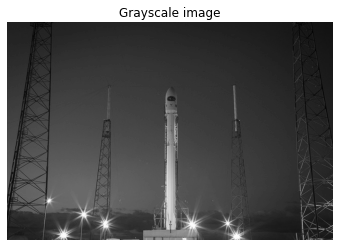

In [3]:
# Load the rocket image
rocket = data.rocket()

# Convert the image to grayscale
gray_scaled_rocket = color.rgb2gray(rocket)

# Show the original image
show_image(rocket, 'Original RGB image')

# Show the grayscale image
show_image(gray_scaled_rocket, 'Grayscale image')

# Second Part

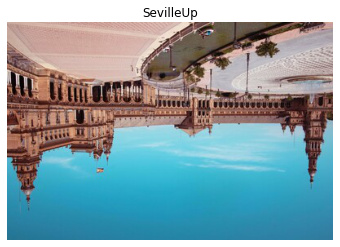

In [4]:
flipped_seville = plt.imread('dataset/sevilleup.jpg')
show_image(flipped_seville,"SevilleUp")


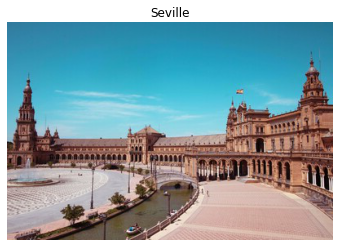

In [5]:
# Flip the image vertically
seville_vertical_flip = np.flipud(flipped_seville)

# Flip the previous image horizontally
seville_horizontal_flip = np.fliplr(seville_vertical_flip)

# Show the resulting image
show_image(seville_horizontal_flip, 'Seville')

# Third Part

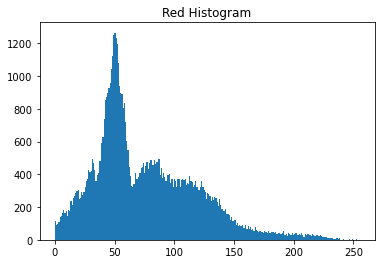

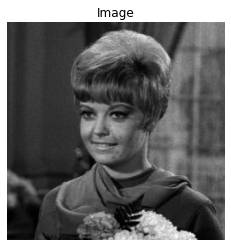

In [6]:
image = plt.imread("dataset/histFirst.jpg")
# Obtain the red channel
red_channel = image[:, :, 0]

# Plot the red histogram with bins in a range of 256
plt.hist(np.ravel(red_channel), bins=256)

# Set title and show
plt.title('Red Histogram')
plt.show()
show_image(red_channel)

# Fourth Part
##### threshold_otsu is a SK function that calculates the ideal threshold value for the picture.

we first changed image to gray from rgb then apply ideal threshold value and create binary image

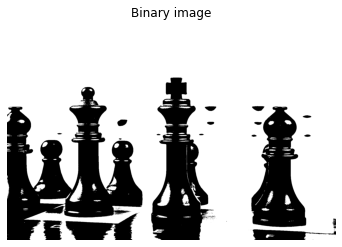

In [7]:
from skimage.filters import threshold_otsu
from skimage import color

chess_pieces_image = plt.imread('dataset/chess_pieces_image.jpg')

# Make the image grayscale using rgb2gray
chess_pieces_image_gray = color.rgb2gray(chess_pieces_image)

# Obtain the optimal threshold value with otsu
thresh = threshold_otsu(chess_pieces_image_gray)

# Apply thresholding to the image
binary = chess_pieces_image_gray > thresh

# Show the image
show_image(binary, 'Binary image')


# Fifth Part

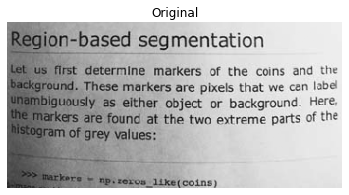

In [8]:
image = plt.imread("dataset/page_image.png")
show_image(image,"Original")

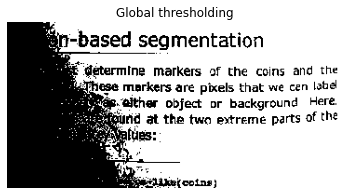

In [9]:
# Import the otsu threshold function
from skimage.filters import threshold_otsu
from skimage import color

image = plt.imread("dataset/page_image.png")

# We need to change image to gray for applying threshold
image = color.rgba2rgb(image) #I changed Image to rgb from rgba for better thresholding because image was rgba first

page_image =color.rgb2gray(image)

# Obtain the optimal otsu global thresh value
global_thresh = threshold_otsu(page_image)

# Obtain the binary image by applying global thresholding
binary_global = page_image > global_thresh

# Show the binary image obtained
show_image(binary_global, 'Global thresholding')

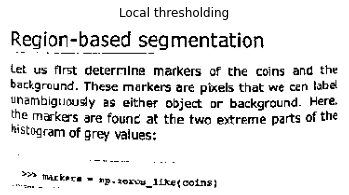

In [10]:
# Import the local threshold function
from skimage.filters import threshold_local

image = plt.imread("dataset/page_image.png")

image = color.rgba2rgb(image)
page_image =color.rgb2gray(image)

# Set the block size to 35
block_size = 35

# Obtain the optimal local thresholding
local_thresh = threshold_local(page_image, block_size, offset=0.1)

# Obtain the binary image by applying local thresholding
binary_local = page_image > local_thresh

# Show the binary image
show_image(binary_local, 'Local thresholding')

# Sixth Part

#### try_all_threshold
is a method for trying various threshold values for orginal picture

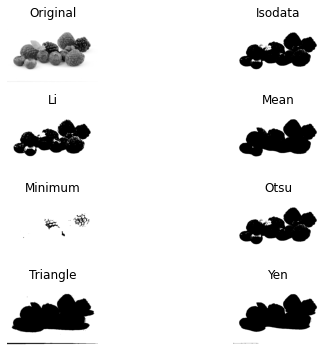

In [11]:
# Import the try all function
from skimage.filters import try_all_threshold

# Import the rgb to gray convertor function 
from skimage.color import rgb2gray

fruits_image = plt.imread("dataset/fruits_image.jpg")

# Turn the fruits_image to grayscale
grayscale = rgb2gray(fruits_image)

# Use the try all method on the resulting grayscale image
fig, ax = try_all_threshold(grayscale, verbose=False)

# Show the resulting plots
plt.show()

# Seventh Part

Again we used optimal threshold value with threshold_otsu and apl

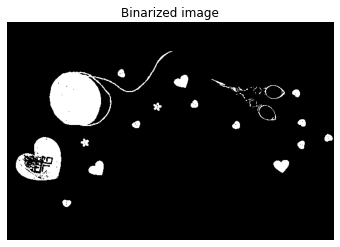

In [12]:
# Import threshold and gray convertor functions
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray

tools_image = plt.imread("dataset/tools_image.jpg")

# Turn the image grayscale
gray_tools_image = rgb2gray(tools_image)

# Obtain the optimal thresh
thresh = threshold_otsu(gray_tools_image)

# Obtain the binary image by applying thresholding
binary_image = gray_tools_image > thresh

# Show the resulting binary image
show_image(binary_image, 'Binarized image')

# TRAINING DATACAMP PART 2

sobel is a function for edge detection

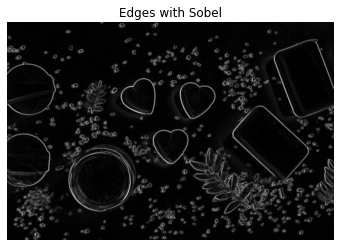

In [13]:
# Import the color module
from skimage import color

# Import the filters module and sobel function
from skimage.filters import sobel

soaps_image = plt.imread("dataset/soaps_image.jpg")

# Make the image grayscale
soaps_image_gray = color.rgb2gray(soaps_image)

# Apply edge detection filter
edge_sobel = sobel(soaps_image_gray)

# Show original and resulting image to compare
show_image(soaps_image, "Original")
show_image(edge_sobel, "Edges with Sobel")

## Second Part

we used gaussian for reducing the sharpness of image

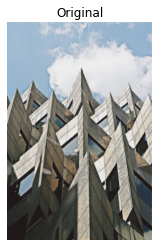

In [14]:
# Import Gaussian filter 
from skimage.filters import gaussian

building_image = plt.imread("dataset/building_image.jpg")

# Apply filter
gaussian_image = gaussian(building_image,multichannel= True)

# Show original and resulting image to compare
show_image(building_image, "Original")


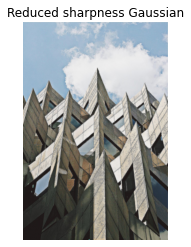

In [15]:
show_image(gaussian_image, "Reduced sharpness Gaussian")

## Third Part
The contrast is the difference between the maximum and minimum pixel intensity( max(255) min(0) ) in the image

In this section we improve the contrast of the image for better details with skimage.exposure()

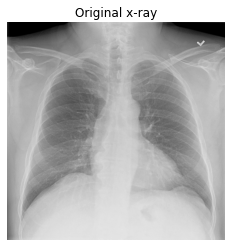

In [16]:
# Import the required module
from skimage import exposure

chest_xray_image=plt.imread("dataset/chest_xray_image.png")

# Show original x-ray image and its histogram
show_image(chest_xray_image, 'Original x-ray')



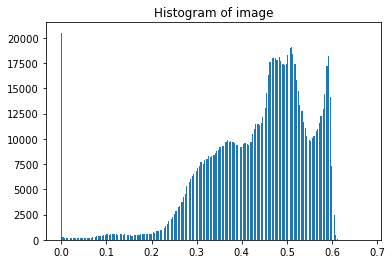

In [17]:
plt.title('Histogram of image')
plt.hist(chest_xray_image.ravel(), bins=256) #RGB images include 256 channels because of that bins=256
plt.show()

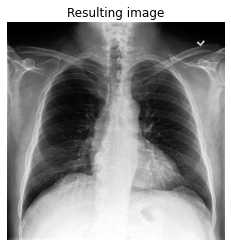

In [18]:
# Use histogram equalization to improve the contrast
xray_image_eq =  exposure.equalize_hist(chest_xray_image)

# Show the resulting image
show_image(xray_image_eq, 'Resulting image')

## Fourth Part

In this exercise, we will improve the quality of an aerial image of a city. The image has low contrast and therefore we can not distinguish all the elements in it.

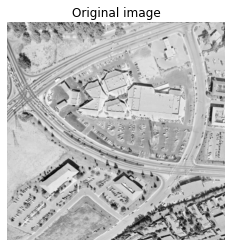

In [19]:
# Import the required module
from skimage import exposure

image_aerial=plt.imread("dataset/image_aerial.png")

# Use histogram equalization to improve the contrast
image_eq =  exposure.equalize_adapthist(image_aerial,clip_limit=0.03)

# Show the original and resulting image
show_image(image_aerial, 'Original image')

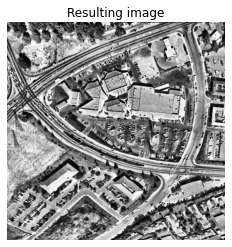

In [20]:
show_image(image_eq, 'Resulting image')

## Fifth Part

Let's add some impact and contrast
Have you ever wanted to enhance the contrast of your photos so that they appear more dramatic?
In this exercise, you'll increase the contrast of a cup of coffee to make it more detailed and looking good for sharing on social media

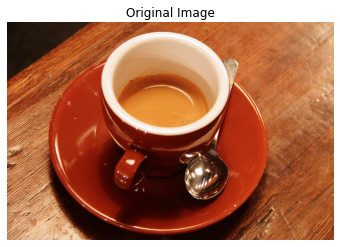

In [21]:
# Import the necessary modules
from skimage import data, exposure

# Load the image
original_image = data.coffee()

# Apply the adaptive equalization on the original image
adapthist_eq_image = exposure.equalize_adapthist(original_image, clip_limit=0.03)

# Compare the original image to the equalized
show_image(original_image, "Original Image")

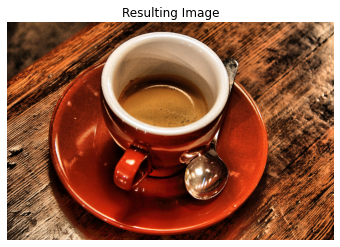

In [22]:
show_image(adapthist_eq_image, 'Resulting Image')

# Sixth Part (Transformations)

Let's look at the impact of aliasing on images.
Remember that aliasing is an effect that causes different signals, in this case pixels, to become indistinguishable or distorted.
You'll make this cat image upright by rotating it 90 degrees and then rescaling it two times. Once with the anti aliasing filter applied before rescaling and a second time without it, so you can compare them.



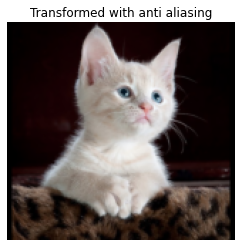

In [23]:
# Import the module and the rotate and rescale functions
from skimage.transform import rotate, rescale

image_cat = plt.imread("dataset/image_cat.jpg")

# Rotate the image 90 degrees clockwise 
rotated_cat_image = rotate(image_cat, -90)

# Rescale with anti aliasing
rescaled_with_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=True, multichannel=True)

# Rescale without anti aliasing
rescaled_without_aa = rescale(rotated_cat_image, 1/4,anti_aliasing=False, multichannel=True)

# Show the resulting images
show_image(rescaled_with_aa, "Transformed with anti aliasing")


##### So as we can see anti aliasing make it less pixelized and smooth

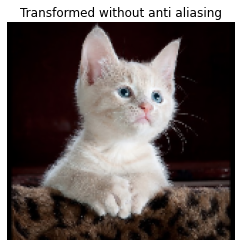

In [24]:
show_image(rescaled_without_aa, "Transformed without anti aliasing")

## Seventh Part (Rescale)
Enlarging images
Have you ever tried resizing an image to make it larger? This usually results in loss of quality, with the enlarged image looking blurry.

The good news is that the algorithm used by scikit-image works very well for enlarging images up to a certain point.

In this exercise you'll enlarge an image three times!!

(427, 640, 3)


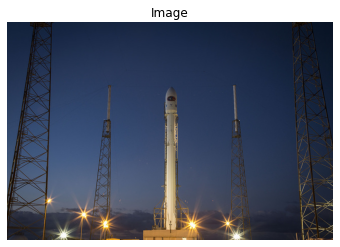

In [25]:
# Import the module and function to enlarge images
from skimage.transform import rescale

# Import the data module
from skimage import data

# Load the image from data
rocket_image = data.rocket()

# Enlarge the image so it is 3 times bigger
enlarged_rocket_image = rescale(rocket_image, 3, anti_aliasing=True, multichannel=True)

# Show original and resulting image
show_image(rocket_image)
print(rocket_image.shape)

##### as we can see from shape enlarged Image is 3 times bigger than orginal Image

(1281, 1920, 3)


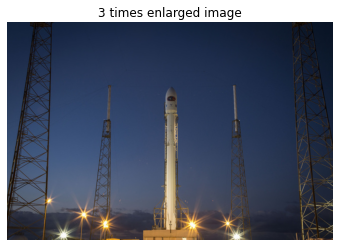

In [26]:
show_image(enlarged_rocket_image, "3 times enlarged image")
print(enlarged_rocket_image.shape)

## Eighth Part
We want to downscale the images of a veterinary blog website so all of them have the same compressed size.

It's important that you do this proportionally, meaning that these are not distorted.
First, you'll try it out for one image so you know what code to test later in the rest of the pictures.

(423, 640, 3)


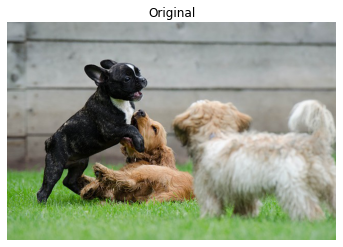

In [27]:
# Import the module and function
from skimage.transform import resize

dogs_banner= plt.imread("dataset/dogs_banner.jpg")

# Set proportional height so its half its size
height = int(dogs_banner.shape[0] / 2)
width = int(dogs_banner.shape[1] / 2)

# Resize using the calculated proportional height and width
image_resized = resize(dogs_banner, (height, width),anti_aliasing=True)

# Show the original and resized image
show_image(dogs_banner, 'Original')
print(dogs_banner.shape)

##### as we can see resize function made it half its size

(211, 320, 3)


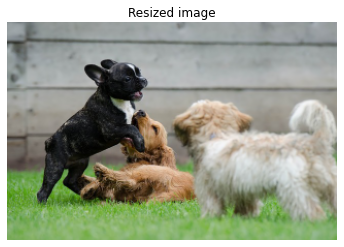

In [28]:
show_image(image_resized, 'Resized image')
print(image_resized.shape)

##### But we can do it with rescale function as well. Again rescale function made it half its size

##### But we can determine the height and width of image more freely with resize function

In [29]:
new = rescale(dogs_banner, 1/2, anti_aliasing=True, multichannel=True)

(212, 320, 3)

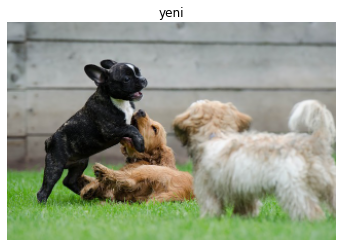

In [30]:
show_image(new,"yeni")
new.shape

## Ninth Part (Morphology)

when you try to spot objects in an image, you can do so by its characteristics, like the shape. This is what Morphology does.

Handwritten letters
A very interesting use of computer vision in real-life solutions is performing Optical Character Recognition (OCR) to distinguish printed or handwritten text characters inside digital images of physical documents.

Let's try to improve the definition of this handwritten letter so that it's easier to classify.


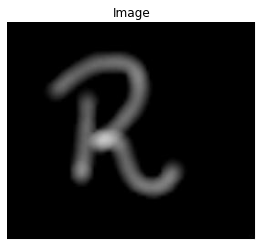

In [31]:
# Import the morphology module
import cv2
from skimage import morphology

upper_r_image = plt.imread("dataset/upper_r_image.jpg")

# Obtain the eroded shape 
eroded_image_shape = morphology.binary_erosion(upper_r_image) 

# See results
show_image(upper_r_image)
#show_image(eroded_image_shape, 'Eroded image')

In [32]:
#cv2.imshow("s",eroded_image_shape)

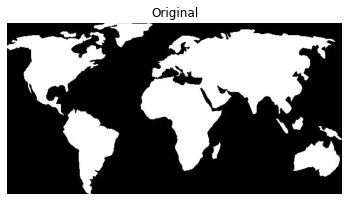

In [33]:
world_image = plt.imread('dataset/world_image.jpg')

# Obtain the dilated image
dilated_image = morphology.binary_dilation(world_image)

# See the result
show_image(world_image, 'Original')

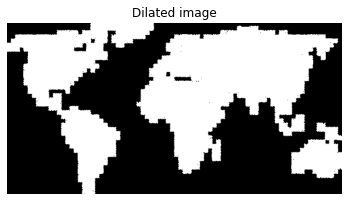

In [34]:
show_image(dilated_image, 'Dilated image')

 # TRAINING DATA CAMP PART3 
 ### (Image Restoration,Segmentation,Noise,Contours)

## Part 1 Restoration

In this exercise, we'll restore an image that has missing parts in it, using the inpaint_biharmonic() function.

In [45]:
def get_mask(image):
    mask= np.zeros(image.shape[:-1]) #taking values except multichannel channel value
    
    mask[10:70, 0:35] = 1
    mask[160:190, 70:170] = 1
    mask[25:100, 325:375] = 1
    mask[350:435, 60:100] = 1
    
    return mask

In [46]:
defect_image.shape[:-1]

(539, 540)

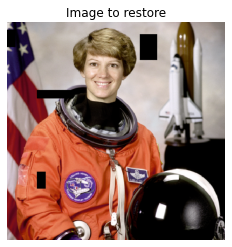

In [47]:
# Import the module from restoration
from skimage.restoration import inpaint

defect_image = plt.imread("dataset/defect_image.png")

mask= get_mask(defect_image)

# Show the defective image
show_image(defect_image, 'Image to restore')


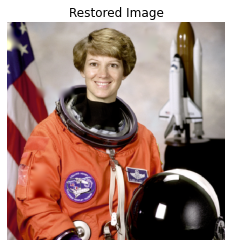

In [48]:
# Apply the restoration function to the image using the mask
restored_image = inpaint.inpaint_biharmonic(defect_image, mask, multichannel=True)
show_image(restored_image,"Restored Image")

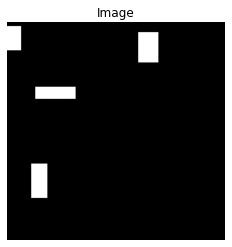

In [49]:
show_image(mask)     #it didnt work well because I couldnt find the exact mask locations

## Part 2
As we saw in the video, another use of image restoration is removing objects from an scene. In this exercise, we'll remove the Datacamp logo from an image.

You will create and set the mask to be able to erase the logo by inpainting this area.

Remember that when you want to remove an object from an image you can either manually delineate that object or run some image analysis algorithm to find it.

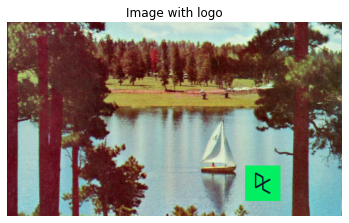

In [50]:
# Initialize the mask
image_with_logo=plt.imread("dataset/image_with_logo.png")

mask = np.zeros(image_with_logo.shape[:-1])

# Set the pixels where the logo is to 1
mask[210:290, 360:425] = 1

# Apply inpainting to remove the logo
image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo,
                                  mask,
                                  multichannel=True)

# Show the original and logo removed images
show_image(image_with_logo, 'Image with logo')

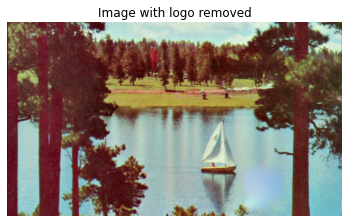

In [51]:
show_image(image_logo_removed, 'Image with logo removed')

## Part 3 Noise
In this exercise, we'll practice adding noise to a fruit image.


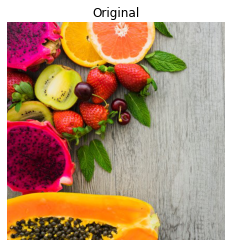

In [52]:
# Import the module and function
from skimage.util import random_noise

fruit_image = plt.imread("dataset/fruit_image.jpg")

# Add noise to the image
noisy_image = random_noise(fruit_image)

# Show original and resulting image
show_image(fruit_image, 'Original')

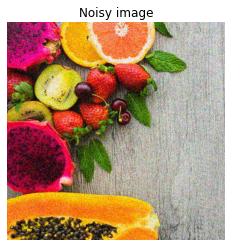

In [53]:
show_image(noisy_image, 'Noisy image')

## Part 4 Reducing Noise
We have a noisy image that we want to improve by removing the noise in it.

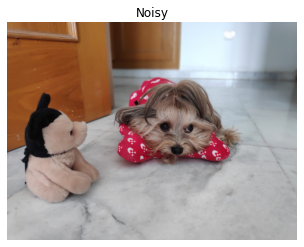

In [54]:
# Import the module and function
from skimage.restoration import denoise_tv_chambolle

noisy_image = plt.imread("dataset/noisy_image.jpeg")

# Apply total variation filter denoising
denoised_image = denoise_tv_chambolle(noisy_image,multichannel=True)

# Show the noisy and denoised images
show_image(noisy_image, 'Noisy')

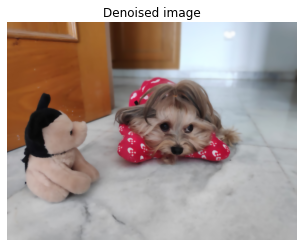

In [55]:
show_image(denoised_image, 'Denoised image')

## Part 5 (Reduce Noise with denoise_bilateral)
In this exercise, you will reduce the noise in this landscape picture.

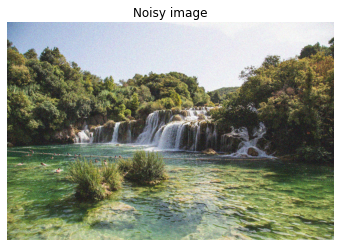

In [56]:
# Import bilateral denoising function
from skimage.restoration import denoise_bilateral

landscape_image = plt.imread("dataset/landscape_image.jpg")

# Apply bilateral filter denoising
denoised_image = denoise_bilateral(landscape_image, multichannel=True)

# Show original and resulting images
show_image(landscape_image, 'Noisy image')

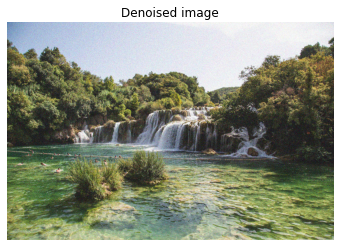

In [57]:
show_image(denoised_image, 'Denoised image')

## Part 6 (Superpixels & segmentation)

Segmentation: The goal is to partition images into regions, or segments, to simplify and/or change the representation into something more meaningful and easier to analyze. 
There are 2 type Segmentation. 1- Supervised  2- Unsupervised

In this exercise, you will apply unsupervised segmentation to the same image, before it's passed to a face detection machine learning model.

So you will reduce this image from 265x191=50,615 pixels down to 400 regions

C:\Users\monster\AppData\Local\Temp/ipykernel_13028/2961459788.py:10: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = slic(face_image, n_segments= 400)
C:\Users\monster\AppData\Local\Temp/ipykernel_13028/2961459788.py:13: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  segmented_image = label2rgb(segments, face_image, kind='avg')
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


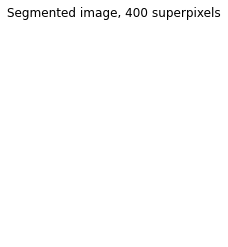

In [58]:
# Import the slic function from segmentation module
from skimage.segmentation import slic

# Import the label2rgb function from color module
from skimage.color import label2rgb

face_image = plt.imread("dataset/face_image.jpg")

# Obtain the segmentation with 400 regions
segments = slic(face_image, n_segments= 400)

# Put segments on top of original image to compare
segmented_image = label2rgb(segments, face_image, kind='avg')

# Show the segmented image
show_image(segmented_image, "Segmented image, 400 superpixels")

## Part 7 Contours

In this exercise we'll find the contour of a horse.

For that we will make use of a binarized image provided by scikit-image in its data module. Binarized images are easier to process when finding contours with this algorithm. Remember that contour finding only supports 2D image arrays.

Once the contour is detected, we will display it together with the original image. That way we can check if our analysis was correct!

In [59]:
def show_image_contour(image, contours):
    fig, ax = plt.subplots()
    ax.imshow(image, cmap=plt.cm.gray)

    for n, contour in enumerate(contours):
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

    ax.axis('image')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


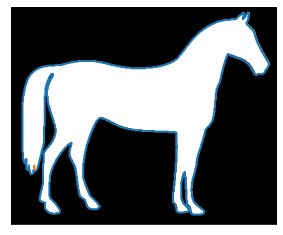

In [60]:
# Import the modules
from skimage import measure, data,filters

# Obtain the horse image
horse_image = data.horse()

#Obtain best threshold value for binarizing image
thresh = filters.threshold_otsu(horse_image)
thresholded_horse = 255 * (horse_image <= thresh) 

# Find the contours with a constant level value of 0.8
contours = measure.find_contours(horse_image, 0.8)

# Shows the image with contours found
show_image_contour(thresholded_horse, contours)

## Part 8

Let's work a bit more on how to prepare an image to be able to find its contours and extract information from it.

We'll process an image of two purple dice loaded as image_dice and determine what number was rolled for each dice.


In [61]:
def show_image_contour(image, contours):
    fig, ax = plt.subplots()
    ax.imshow(image, cmap=plt.cm.gray)

    for n, contour in enumerate(contours):
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

    ax.axis('image')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

C:\Users\monster\AppData\Local\Temp/ipykernel_13028/188079469.py:5: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  image_dice = color.rgb2gray(image_dice)


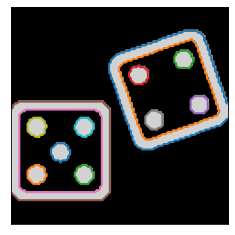

In [62]:
# Make the image grayscale

image_dice=plt.imread("dataset/image_dice.png")

image_dice = color.rgb2gray(image_dice)

# Obtain the optimal thresh value
thresh = filters.threshold_otsu(image_dice)

# Apply thresholding
binary = image_dice > thresh

# Find contours at a constant value of 0.8
contours = measure.find_contours(binary, 0.8)

# Show the image
show_image_contour(image_dice, contours)

In [63]:
#we can see each contour's shape there 9 point which shape[0] is between 40 and 45 these are the rounds on the dice

for contour in contours:       
    print(contour.shape)

(255, 2)
(221, 2)
(43, 2)
(45, 2)
(41, 2)
(173, 2)
(181, 2)
(43, 2)
(45, 2)
(45, 2)
(45, 2)
(45, 2)
(45, 2)


Now we have found the contours, we can extract information from it.

In the previous exercise, we prepared a purple dices image to find its contours:

This time we'll determine what number was rolled for the dice, by counting the dots in the image.

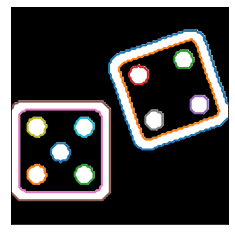

Dice's dots number: 9. 


In [64]:
# Create list with the shape of each contour
shape_contours = [cnt.shape[0] for cnt in contours]

# Set 50 as the maximum size of the dots shape
max_dots_shape = 50

# Count dots in contours excluding bigger than dots size
dots_contours = [cnt for cnt in contours if np.shape(cnt)[0] < max_dots_shape]

# Shows all contours found 
show_image_contour(binary, contours)

# Print the dice's number
print("Dice's dots number: {}. ".format(len(dots_contours)))

 # TRAINING DATA CAMP PART4 (Edges with Canny)
 
 ### Canny is one of the most used edge detection technique


## Part 1 Edges
In this exercise you will identify the shapes in a grapefruit image by detecting the edges, using the Canny algorithm.

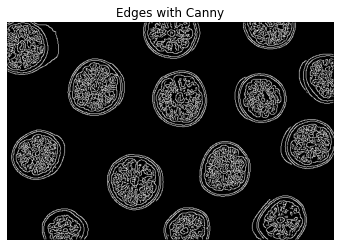

In [65]:
# Import the canny edge detector 
from skimage.feature import canny

grapefruit = plt.imread("dataset/grapefruit.jpg")

# Convert image to grayscale
grapefruit = color.rgb2gray(grapefruit)

# Apply canny edge detector
canny_edges = canny(grapefruit)

# Show resulting image
show_image(canny_edges, "Edges with Canny")

LESS EDGY

Let's now try to spot just the outer shape of the grapefruits, the circles. You can do this by applying a more intense Gaussian filter to first make the image smoother. This can be achieved by specifying a bigger sigma in the canny function.

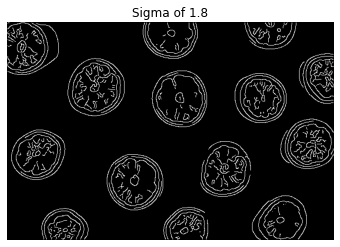

In [66]:
# Apply canny edge detector with a sigma of 1.8
edges_1_8 = canny(grapefruit, sigma=1.8)

# Apply canny edge detector with a sigma of 2.2
edges_2_2 = canny(grapefruit, sigma=2.2)

# Show resulting images
show_image(edges_1_8, "Sigma of 1.8")

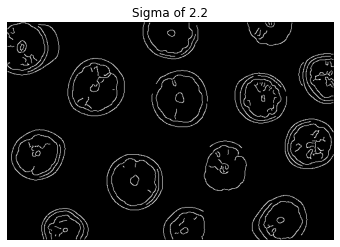

In [67]:
show_image(edges_2_2, "Sigma of 2.2")

## Part 2 Corners

In this exercise, you will detect the corners of a building using the Harris corner detector. The threshold_rel parameter will specify the minimum intensity of peaks.

In [68]:
def show_image_with_corners(image, coords, title="Corners detected"):
    plt.figure(figsize=(8, 12))
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15)
    plt.axis('off')
    plt.show()

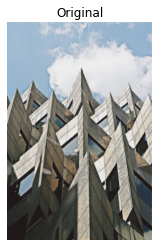

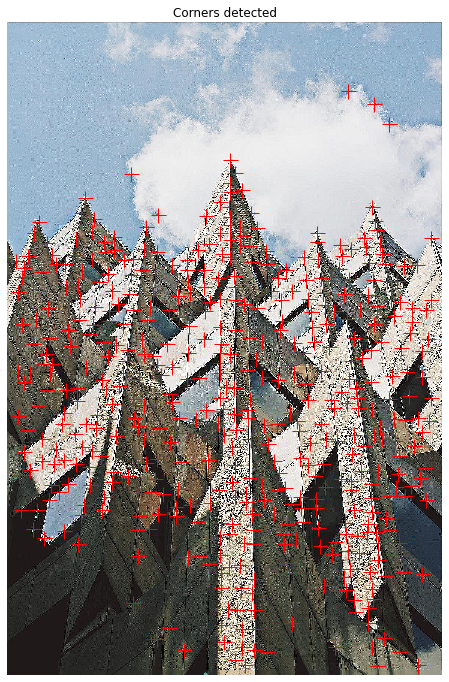

In [69]:
# Import the corner detector related functions and module
from skimage.feature import corner_harris, corner_peaks

building_image= plt.imread("dataset/building_image.jpg")

# Convert image from RGB-3 to grayscale
building_image_gray = color.rgb2gray(building_image)

# Apply the detector  to measure the possible corners
measure_image = corner_harris(building_image_gray)

# Find the peaks of the corners using the Harris detector
coords = corner_peaks(measure_image, min_distance=20, threshold_rel=0.02)

# Show original and resulting image with corners detected
show_image(building_image, "Original")
show_image_with_corners(building_image, coords)

LESS CORNERS

In this exercise, you will test what happens when you set the minimum distance between corner peaks to be a higher number. Remember you do this with the min_distance attribute parameter of the corner_peaks() function. The threshold_rel parameter will specify the minimum intensity of peaks.

With a min_distance set to 10, we detect a total 1390 corners in the image.
With a min_distance set to 60, we detect a total 68 corners in the image.


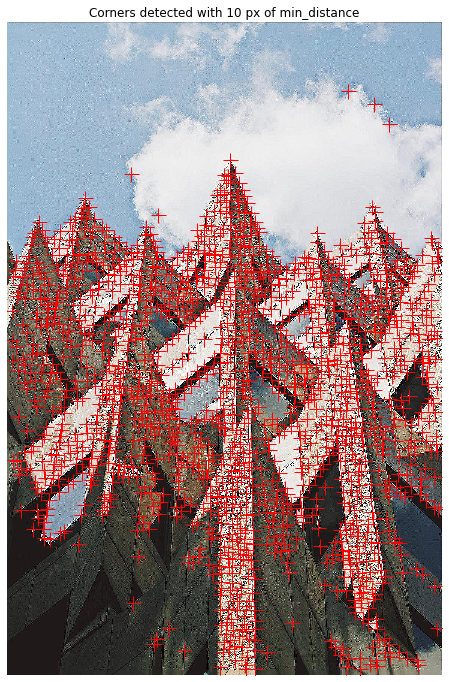

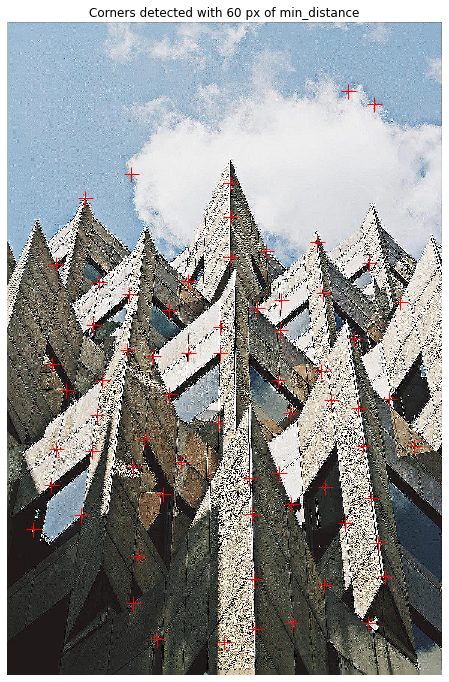

In [70]:
# Find the peaks with a min distance of 10 pixels
coords_w_min_10 = corner_peaks(measure_image, min_distance=10, threshold_rel=0.02)
print("With a min_distance set to 10, we detect a total", len(coords_w_min_10), "corners in the image.")

# Find the peaks with a min distance of 60 pixels
coords_w_min_60 = corner_peaks(measure_image, min_distance=60, threshold_rel=0.02)
print("With a min_distance set to 60, we detect a total", len(coords_w_min_60), "corners in the image.")

# Show original and resulting image with corners detected
show_image_with_corners(building_image, coords_w_min_10, "Corners detected with 10 px of min_distance")
show_image_with_corners(building_image, coords_w_min_60, "Corners detected with 60 px of min_distance")

## Part 3 Face Detection

In this exercise, you will check whether or not there is a person present in an image taken at night.

In [71]:
from skimage.feature import Cascade

In [72]:
from matplotlib import patches

def show_detected_face(result, detected, title="Face image"):
    plt.figure(figsize=(8, 12))
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')

    for patch in detected:
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False,color='b',linewidth=2
            )
        )

    plt.show()

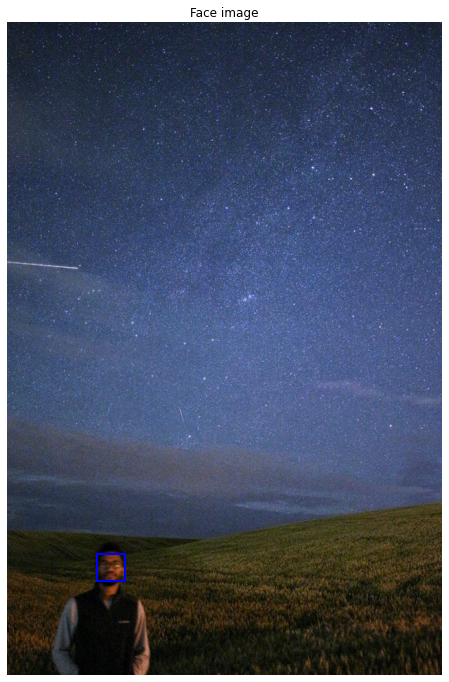

In [73]:
# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

night_image=plt.imread("dataset/night_image.jpg")

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with min and max size of searching window
detected = detector.detect_multi_scale(img = night_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10,10),
                                       max_size=(200,200))

# Show the detected faces
show_detected_face(night_image, detected)

## Part 4 Multiple faces
In this exercise, you will detect multiple faces in an image and show them individually. Think of this as a way to create a dataset of your own friends' faces!

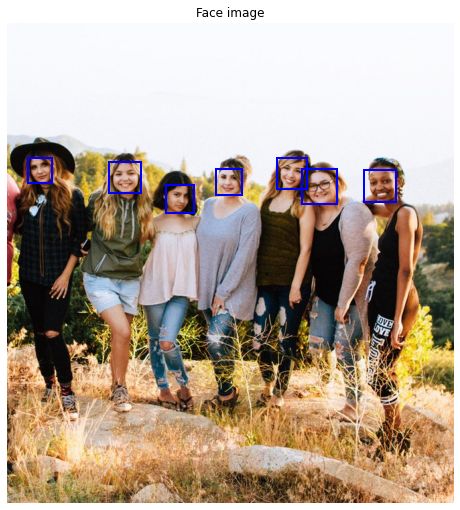

In [74]:
# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

friends_image=plt.imread("dataset/friends_image.jpg")

# Detect faces with scale factor to 1.2 and step ratio to 1
detected = detector.detect_multi_scale(img=friends_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(200, 200))
# Show the detected faces
show_detected_face(friends_image, detected)

## Part 5 Segmentation and face detection

Previously, you learned how to make processes more computationally efficient with unsupervised superpixel segmentation. In this exercise, you'll do just that!

C:\Users\monster\AppData\Local\Temp/ipykernel_13028/786383896.py:11: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = segmentation.slic(selfie, n_segments=100)
C:\Users\monster\AppData\Local\Temp/ipykernel_13028/786383896.py:13: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  segmented_selfie = color.label2rgb(segments, selfie, kind='avg') #kind avg takes average of detected faces


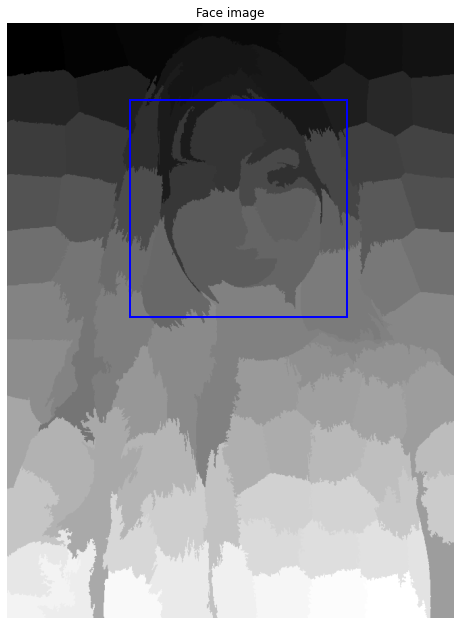

In [75]:
from skimage import segmentation
from skimage import io

# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

selfie = io.imread('dataset/profile_image.jpg')
segments = segmentation.slic(selfie, n_segments=100)

segmented_selfie = color.label2rgb(segments, selfie, kind='avg') #kind avg takes average of detected faces
detected = detector.detect_multi_scale(
    img=segmented_selfie,
    scale_factor=1.2,
    step_ratio=1, 
    min_size=(10, 10),
    max_size=(1000, 1000)
)
show_detected_face(segments, detected) #it doesnt show segmented_selfie because of that I used segments one

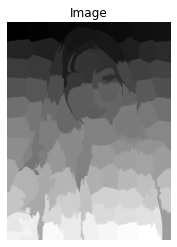

In [76]:
show_image(segments)